### <b>1. Importing/loading libraries</b>

In [7]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### <b>2. Data preprocessing</b>

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
Max value: 255, Min value: 0
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


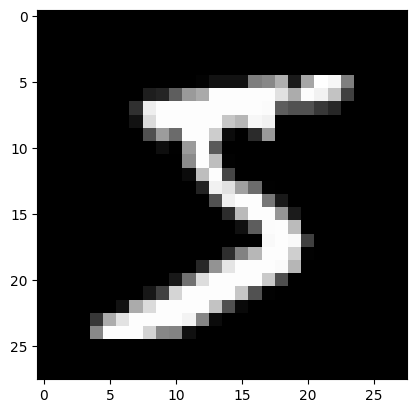

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Max value: {X_train[0].max()}, Min value: {X_train[0].min()}")

X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)

X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

plt.imshow(X_train[0], cmap="gray")

In [64]:
import tensorflow as tf

input_shape = (28, 28, 1)
number_of_classes = 10

cnn_model = tf.keras.models.Sequential()
cnn_model.add(tf.keras.layers.Conv2D( # 28 - 3 + 1 = 26
    32, (3, 3), activation = "relu", input_shape = input_shape
))
cnn_model.add(tf.keras.layers.Conv2D( # 26 - 3 + 1 = 24
    64, (3, 3), activation = "relu"
))
cnn_model.add(tf.keras.layers.Conv2D( # 24 - 3 + 1 = 22
    128, (3, 3), activation = "relu"
))
cnn_model.add(tf.keras.layers.MaxPooling2D(
    (2, 2)
))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(128, activation = "relu"))
cnn_model.add(tf.keras.layers.Dense(64, activation = "relu"))
cnn_model.add(tf.keras.layers.Dense(10, activation = "softmax"))

cnn_model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

cnn_model.compile(
    optimizer = optimizer,
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

c:\Users\PanCh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,084,170 (7.95 MB)

 Trainable params: 2,084,170 (7.95 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
print(f"X_train shape: {X_train.shape}\n")
print(f"Number of images: {X_train.shape[0]}")
print(f"Width of image: {X_train.shape[1]}")
print(f"Height of image: {X_train.shape[2]}")
print(f"Number of channels: {X_train.shape[3]}\n")

print(f"y_train / output vector: {y_train}")

cnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

X_train shape: (60000, 28, 28, 1)

Number of images: 60000
Width of image: 28
Height of image: 28
Number of channels: 1

y_train / output vector: [5 0 4 ... 5 6 8]
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.9227 - loss: 0.2412
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9884 - loss: 0.0375
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.9934 - loss: 0.0220
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9949 - loss: 0.0165
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9960 - loss: 0.0134
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9968 - loss: 0.0118
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9969 - loss: 0.0090
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9980 - loss: 0.0067
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9981 - loss: 0.0061
Epoch 10/10
1875/1875 ━━━━

In [59]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_predicted = cnn_model.predict(X_test)

y_predicted = np.argmax(y_predicted, axis = -1)

print(f"y_predicted: \n{y_predicted}\n")

accuracy_score_result = accuracy_score(y_true = y_test, y_pred = y_predicted)

print(f"Accuracy score: {accuracy_score_result}")

confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print(f"Confusion matrix: \n{confusion_matrix_result}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
y_predicted: 
[7 2 1 ... 4 5 6]

Accuracy score: 0.9906
Confusion matrix: 
[[ 977    0    1    0    0    0    0    0    1    1]
 [   0 1133    0    0    0    0    1    0    0    1]
 [   1    2 1021    0    0    0    0    5    3    0]
 [   1    0    2 1001    0    3    0    1    1    1]
 [   0    2    0    0  970    0    4    1    2    3]
 [   1    1    0    6    0  882    1    0    0    1]
 [   2    2    0    0    1    3  949    0    1    0]
 [   0    3    4    0    0    0    0 1018    1    2]
 [   2    1    1    1    0    2    0    1  963    3]
 [   0    1    0    1    3    5    0    4    3  992]]
